In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import scipy as sp

In [ ]:
x = random.sample(range(1,101), 30)
y = random.sample(range(1,101), 30)

In [ ]:
print(x)
print(y)

[88, 13, 86, 5, 70, 8, 43, 82, 76, 54, 57, 42, 58, 65, 61, 59, 78, 44, 11, 75, 80, 97, 19, 68, 7, 98, 47, 23, 36, 39]
[25, 10, 95, 58, 56, 30, 34, 86, 72, 45, 92, 35, 17, 13, 98, 49, 38, 40, 68, 80, 16, 23, 39, 67, 59, 81, 11, 62, 60, 47]


In [ ]:
points = pd.DataFrame({'x' : x,'y': y})

In [ ]:
points.head()

,x,y
0,88,25
1,13,10
2,86,95
3,5,58
4,70,56


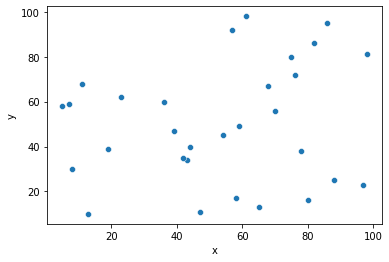

In [ ]:
sns.scatterplot(x="x", y="y", data=points, palette="Set2");

In [ ]:
centroids = points.sample(3)
centroids

,x,y
20,80,16
26,47,11
2,86,95


In [ ]:
distance = sp.spatial.distance.cdist(points, centroids, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,88,25,0
1,13,10,1
2,86,95,2
3,5,58,1
4,70,56,0


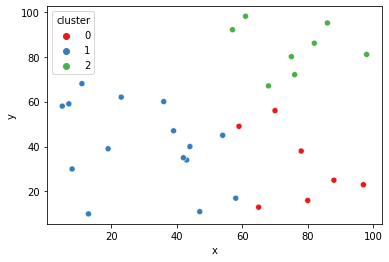

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set1");

In [ ]:
centroids_2 = result.groupby("cluster").mean()
centroids_2

,x,y
cluster,,
0,76.714286,31.428571
1,29.933333,41.000000
2,75.375000,83.875000


In [ ]:
distance = sp.spatial.distance.cdist(points, centroids_2, "euclidean")
cluster_num = np.argmin(distance, axis=1)

result = points.copy()
result["cluster"] = np.array(cluster_num)
result.head()

,x,y,cluster
0,88,25,0
1,13,10,1
2,86,95,2
3,5,58,1
4,70,56,0


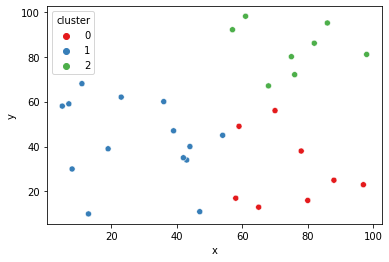

In [ ]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result, palette="Set1");

### __Scikit-Learn KMeans()__

In [13]:
model = KMeans(n_clusters = 3, random_state = 0)
model.fit(points)

KMeans(n_clusters=3, random_state=0)

In [14]:
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = model.labels_
result_by_sklearn.head()

,x,y,cluster
0,88,25,2
1,13,10,1
2,86,95,0
3,5,58,1
4,70,56,0


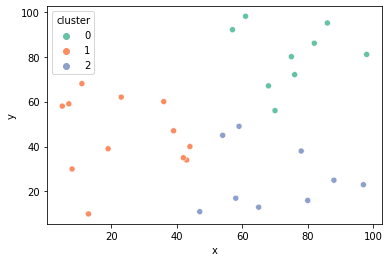

In [15]:
sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2");

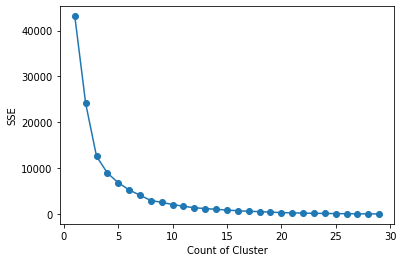

In [16]:
def elbow(data, max_cluster):
  sse = []
  for i in range(1, max_cluster):
    km = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    km.fit(data)
    sse.append(km.inertia_)
    pass
  plt.plot(range(1, max_cluster), sse, marker='o')
  plt.xlabel('Count of Cluster')
  plt.ylabel('SSE')
  plt.show()
  pass
elbow(points, 30)